<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/bysykkel_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bysyykel Oslo

## Uploading packages and data

In [1]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Remove previous versions of the uploaded excel file
!rm 2020_11_bysykkel.csv

In [21]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2020_10_bysykkel.csv to 2020_10_bysykkel (1).csv


In [22]:
#Storing dataset in a Pandas Dataframe
import io
by_df = pd.read_csv(io.BytesIO(uploaded['2020_10_bysykkel.csv']), parse_dates=True, infer_datetime_format=True)

In [23]:
#Checking the dataframe information
by_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162519 entries, 0 to 162518
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   started_at                 162519 non-null  object 
 1   ended_at                   162519 non-null  object 
 2   duration                   162519 non-null  int64  
 3   start_station_id           162519 non-null  int64  
 4   start_station_name         162519 non-null  object 
 5   start_station_description  162519 non-null  object 
 6   start_station_latitude     162519 non-null  float64
 7   start_station_longitude    162519 non-null  float64
 8   end_station_id             162519 non-null  int64  
 9   end_station_name           162519 non-null  object 
 10  end_station_description    162519 non-null  object 
 11  end_station_latitude       162519 non-null  float64
 12  end_station_longitude      162519 non-null  float64
dtypes: float64(4), int64(3), obje

##Data cleaning and manipulation

In [24]:
#Convert columns into datetime object and Oslo timezone
by_df['started_at'] = pd.to_datetime(by_df['started_at'], format='%Y-%m-%d %H:%M:%S').dt.tz_convert('Europe/Oslo')
by_df['ended_at'] = pd.to_datetime(by_df['ended_at'], format='%Y-%m-%d %H:%M:%S').dt.tz_convert('Europe/Oslo')
by_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162519 entries, 0 to 162518
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype                      
---  ------                     --------------   -----                      
 0   started_at                 162519 non-null  datetime64[ns, Europe/Oslo]
 1   ended_at                   162519 non-null  datetime64[ns, Europe/Oslo]
 2   duration                   162519 non-null  int64                      
 3   start_station_id           162519 non-null  int64                      
 4   start_station_name         162519 non-null  object                     
 5   start_station_description  162519 non-null  object                     
 6   start_station_latitude     162519 non-null  float64                    
 7   start_station_longitude    162519 non-null  float64                    
 8   end_station_id             162519 non-null  int64                      
 9   end_station_name           162519 non

In [25]:
#Checking the dataframe head
by_df.head(2)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-10-01 05:00:30.500000+02:00,2020-10-01 05:16:08.174000+02:00,937,447,Kværnerbyen,langs Smeltedigelen,59.904473,10.786167,406,Carl Berners plass sør,langs Finnmarkgata,59.925070,10.775996
1,2020-10-01 05:00:32.536000+02:00,2020-10-01 05:03:04.912000+02:00,152,412,Jakob kirke,langs Torggata,59.917866,10.754898,495,Vaterlandsparken,langs Brugata,59.913516,10.757335


In [26]:
#Creating 2 dataframes, one with starting trips and one with end trips
st_df = by_df[['started_at', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'duration']]
en_df = by_df[['ended_at', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'duration']]

In [27]:
#Creating a function to extract categories from datetime object
def convert_dates(df):
  """Extract year, month, week number, day, hour and minutes from datetime column"""
  df = df.assign(year = df.iloc[:,0].dt.year,
                 month = df.iloc[:,0].dt.month_name(),
                 weeknum = df.iloc[:,0].dt.isocalendar().week,
                 day = df.iloc[:,0].dt.day_name(),
                 hour = df.iloc[:,0].dt.hour,
                 minute = df.iloc[:,0].dt.minute
                 )
  return df

In [28]:
#Converting dates for starting journeys dataframe
st_df = convert_dates(st_df)
st_df.head(2)

,started_at,start_station_id,start_station_name,start_station_latitude,start_station_longitude,duration,year,month,weeknum,day,hour,minute
0,2020-10-01 05:00:30.500000+02:00,447,Kværnerbyen,59.904473,10.786167,937,2020,October,40,Thursday,5,0
1,2020-10-01 05:00:32.536000+02:00,412,Jakob kirke,59.917866,10.754898,152,2020,October,40,Thursday,5,0


In [29]:
#Converting dates for end journeys dataframe
en_df = convert_dates(en_df)
en_df.head(2)

,ended_at,end_station_id,end_station_name,end_station_latitude,end_station_longitude,duration,year,month,weeknum,day,hour,minute
0,2020-10-01 05:16:08.174000+02:00,406,Carl Berners plass sør,59.925070,10.775996,937,2020,October,40,Thursday,5,16
1,2020-10-01 05:03:04.912000+02:00,495,Vaterlandsparken,59.913516,10.757335,152,2020,October,40,Thursday,5,3


In [30]:
#Computing Top start_location stations
st_loc = st_df.groupby(['year', 'month', 'start_station_name', 'start_station_latitude', 'start_station_longitude']).agg({'start_station_id': 'count',
                                                                                                         'duration': 'mean'}).reset_index()
st_loc = st_loc.assign(duration = round(st_loc['duration']/60, 2))
st_loc = st_loc.rename(columns={'start_station_id': 'trips', 'duration': 'mean_min'}).sort_values(by='trips', ascending=False).reset_index(drop=True)
st_loc = st_loc.rename(columns={'start_station_name':'name', 'start_station_latitude':'lat', 'start_station_longitude':'lon'})
st_loc.head(10)

,year,month,name,lat,lon,trips,mean_min
0,2020,October,Ringnes Park,59.928434,10.759430,2489,9.73
1,2020,October,Alexander Kiellands Plass,59.928067,10.751203,2372,9.72
2,2020,October,Olaf Ryes plass,59.922425,10.758182,2194,9.87
3,2020,October,Bislett Stadion,59.925471,10.731219,1832,9.88
4,2020,October,Helga Helgesens plass,59.912111,10.766194,1783,9.93
5,2020,October,Bislettgata,59.923774,10.734713,1746,10.65
6,2020,October,Torggata,59.915983,10.751551,1744,9.41
7,2020,October,AHO,59.925265,10.750462,1625,9.70
8,2020,October,Jernbanetorget,59.911901,10.749929,1541,10.00
9,2020,October,Tøyen skole,59.914943,10.773977,1514,9.09


In [31]:
#Computing top hours by month
st_hr = st_df.groupby(['year', 'month', 'hour']).agg({'start_station_id': 'count'}).reset_index()
st_hr = st_hr.rename(columns={'start_station_id': 'count'}).sort_values(by='hour').reset_index(drop=True)
st_hr

,year,month,hour,count
0,2020,November,0,80
1,2020,October,0,2013
2,2020,October,1,3
3,2020,October,2,1
4,2020,October,5,810
5,2020,October,6,4078
6,2020,October,7,10814
7,2020,October,8,13594
8,2020,October,9,7609
9,2020,October,10,5712


In [32]:
#Computing Top end_location stations
en_loc = en_df.groupby(['year', 'month', 'end_station_name', 'end_station_latitude', 'end_station_longitude']).agg({'end_station_id': 'count',
                                                                                                   'duration': 'mean'}).reset_index()
en_loc = en_loc.assign(duration = round(en_loc['duration']/60, 2))
en_loc = en_loc.rename(columns={'end_station_id': 'trips', 'duration': 'mean_min'}).sort_values(by='trips', ascending=False).reset_index(drop=True)
en_loc = en_loc.rename(columns={'end_station_name':'name', 'end_station_latitude':'lat', 'end_station_longitude':'lon'})
en_loc.head(10)

,year,month,name,lat,lon,trips,mean_min
0,2020,October,Torggata,59.915983,10.751551,2789,8.89
1,2020,October,Rådhusbrygge 4,59.910847,10.730377,2581,11.44
2,2020,October,Ringnes Park,59.928434,10.759430,2489,10.16
3,2020,October,Alexander Kiellands Plass,59.928067,10.751203,2364,10.25
4,2020,October,Helga Helgesens plass,59.912111,10.766194,2304,11.06
5,2020,October,Olaf Ryes plass,59.922425,10.758182,2265,9.78
6,2020,October,Akersgata,59.914197,10.742883,2222,9.02
7,2020,October,Kirkeristen,59.913000,10.746761,2117,9.63
8,2020,October,Sjøsiden ved trappen,59.910154,10.751981,2082,10.92
9,2020,October,Vaterlandsparken,59.913516,10.757335,1887,8.20


In [33]:
#Computing top hours by month
en_hr = en_df.groupby(['year', 'month', 'hour']).agg({'end_station_id': 'count'}).reset_index()
en_hr = en_hr.rename(columns={'end_station_id': 'count'}).sort_values(by='hour').reset_index(drop=True)
en_hr

,year,month,hour,count
0,2020,November,0,75
1,2020,October,0,2119
2,2020,November,1,15
3,2020,October,1,339
4,2020,November,2,1
5,2020,October,2,7
6,2020,October,3,3
7,2020,October,5,632
8,2020,October,6,3361
9,2020,October,7,9392


In [34]:
#Exporting to csv into local disk
from google.colab import files
st_loc.to_csv('2020_10_st_loc.csv', index=False, header=False)
files.download('2020_10_st_loc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
#Exporting to csv into local disk
from google.colab import files
st_hr.to_csv('2020_10_st_hr.csv', index=False, header=False)
files.download('2020_10_st_hr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
#Exporting to excel into local disk
from google.colab import files
en_loc.to_csv('2020_10_en_loc.csv', index=False, header=False)
files.download('2020_10_en_loc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
#Exporting to csv into local disk
from google.colab import files
en_hr.to_csv('2020_10_en_hr.csv', index=False, header=False)
files.download('2020_10_en_hr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Data Visualization

###Data, packages and custom theme

In [ ]:
#Add interactivity to graphs
import ipywidgets as widgets
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
#Uploading visualization packages
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
#Customizing data visualization styles

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title

In [ ]:
#Customizing dark theme
plt.style.use(['dark_background'])
plt.rcParams['axes.facecolor'] = (0,0,0,0)
plt.rcParams['figure.facecolor'] = '#383838' #To match google colab native dark theme
plt.rcParams["legend.frameon"] = False
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams["legend.facecolor"] = (0,0,0,0)
#plt.rcParams["font.family"] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Open Sans', 'Source Sans Pro', 'Noto Sans']
plt.rcParams['hist.bins'] = 50
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes3d.grid'] = False

#New settings
plt.rcParams['figure.subplot.hspace'] = 0.3 #default = 0.2
#plt.rcParams['figure.constrained_layout.h_pad'] = 0.4 #default = 0.04167
#plt.rcParams['figure.constrained_layout.hspace'] = 0.1 #default = 0.02

from cycler import cycler

plt.rcParams['axes.prop_cycle'] = (cycler(color=['#e74c3c', '#b86dd6', '#fca821', '#3498db', '#f1c40f', '#ffa847', '#c4ef7a', '#e195e2', '#ced9ed', '#fff29b'])\
                                   + cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']))

In [ ]:
#Remove previous versions of the uploaded csv file
!rm 2021_04_st_loc.csv

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded1 = files.upload()

In [ ]:
#Reading aggregated data and storing into a Pandas Dataframe
import io
st_loc = pd.read_csv(io.BytesIO(uploaded1['2021_04_st_loc.csv']))

###Preparing data for visualization

In [ ]:
#Drop name columns
hm_df = st_loc.copy()
hm_df = hm_df.drop(columns=['year', 'month', 'name', 'mean_min'])
hm_df.head()

,lat,lon,trips
0,59.928434,10.759430,1570
1,59.928067,10.751203,1522
2,59.929045,10.716926,1289
3,59.923774,10.734713,1242
4,59.910847,10.730377,1189


In [ ]:
#Create a function to convert lat, lon, and weight to list. Folium does not take DataFrames
def convert_to_list(df):
  """Convert dataframe to list of lat, lon and weight"""
  lat = df['lat'].to_numpy(dtype=float)
  lon = df['lon'].to_numpy(dtype=float)
  weight = df['trips'].to_numpy(dtype=float)
  return [[l, g, w] for l, g, w in zip(lat, lon, weight)]

In [ ]:
#Convert lat, long and weight to list
heat_data = convert_to_list(hm_df)
heat_data[:5]

[[59.92843404417578, 10.75943014633117, 1570.0],
 [59.92806670615685, 10.751202636819613, 1522.0],
 [59.929044999999995, 10.716925999999999, 1289.0],
 [59.92377440938114, 10.734712874573999, 1242.0],
 [59.9108469, 10.7303766, 1189.0]]

In [ ]:
#Creating a function to generate a basemap
def generate_basemap(default_loc=[59.92,10.75], default_zoom=13):
    bmap = folium.Map(location=default_loc, zoom_start=default_zoom)
    return bmap

In [ ]:
#Generating a basemap
basemap = generate_basemap()

In [ ]:
#Creating a HeatMap with lat, lon and number of trips
HeatMap(heat_data[:10]).add_to(basemap)

In [ ]:
#Creating a function to plot the interactive dashboard

def plot_dashboard(year, month):
  """Plot the starting point of trips, location and average minutes per station """
  
  #Creating a slice and copy of input dataframe
  df = st_loc.copy()
  df = df[(df['year']==year) & (df['month']==month)][:5]
  
  #Creating constants for plotting
  siblred = ['#C0C0C0', '#4374B3', '#FF0B04'] #=>#RdYlGn_r | nipy_spectral

  #Create four subplots and unpack the output array immediately
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

  #Set title for the figure
  fig.suptitle("Bysykkel Dashboard", fontsize=24)

  #Accessing axes objects and plotting
  
  sns.barplot(x='name', y='trips', data=df, ax=ax1)
  #basemap = generate_basemap()
  sns.barplot(x='name', y='mean_min', data=df, ax=ax3)
    
  #Customizing axes labels and titles for first axes figure
  ax1.set_xlabel('Station names')
  ax1.set_ylabel('Number of Trips')
  ax1.set_title('Top stations as starting point')
  
  #Customizing axes labels and titles for second axes figure
  ax2.set_title('Top 20 startpoint trips')

  #Customizing axes labels and titles for third axes figure
  ax3.set_xlabel('Station names')
  ax3.set_ylabel('Average minutes')
  ax3.set_title('Average minute ride')

  #Prevent from axis to colliding or overlaping one another.
  fig.tight_layout()
  fig.subplots_adjust(top=0.88)

###Dashboard

In [ ]:
#Generating widgets options
yr = [2021]
month = ['April']

#Plotting Complaints for Oslo Plant with interactive widgets
interact(plot_dashboard,
         year=widgets.Dropdown(options=yr, value=yr[0], description='Year', disabled=False),
         month=widgets.Dropdown(options=month, value=month[0], description='Month', disabled=False))
plt.show()

interactive(children=(Dropdown(description='Year', options=(2021,), value=2021), Dropdown(description='Month',…

In [ ]:
#Plotting basemap for starting point of trips
basemap

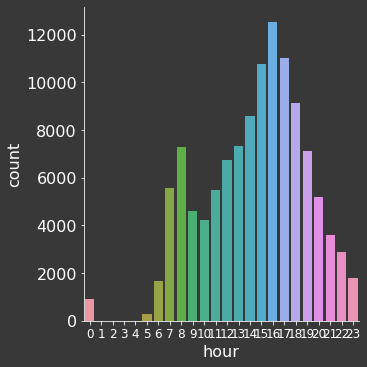

In [ ]:
#Test: Plotting the rush hours for a given month
ord = [i for i in range(0, 24)]
sns.catplot(x='hour', y='count', data=st_hr, kind='bar', order=ord, ci=False, )
plt.show()